In [1]:
import glob
import os

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
sns.set_theme(style='darkgrid')

In [4]:
OUTPUT_DIR = './outputs'

In [5]:
list_result_files = glob.glob(os.path.join(OUTPUT_DIR, '**', 'test_results.csv'), recursive=True)

In [6]:
list_result_files
df_full = []
for f in list_result_files:
    path_split = f.split('/')
    seed = int(path_split[2].split('_')[-1])
    method = path_split[3]
    backbone = path_split[4]
    if method == 'supervised':
        mode = 'finetune'
        folds = int(path_split[5].split('_')[0])
        category = path_split[6]
    else:
        mode = path_split[5]
        folds = int(path_split[6].split('_')[0])
        category = path_split[7]
    
    df_temp = pd.read_csv(f)
    df_temp['Method'] = method
    df_temp['Backbone'] = backbone
    df_temp['Mode'] = mode
    df_temp['Folds'] = folds
    df_temp['Category'] = category
    df_temp['Seed'] = seed
    df_full.append(df_temp)
    
df_full = pd.concat(df_full, axis=0)
df_full

,Epoch,Loss,mAP,LRAP,mAUC,Method,Backbone,Mode,Folds,Category,Seed
0,60,0.022112,0.378142,0.808599,0.914014,simclr,xresnet1d50,finetune,7,subclass,3
0,27,0.270044,0.728974,0.895156,0.914289,simclr,xresnet1d50,finetune,7,superclass,3
0,137,0.025937,0.340198,0.793126,0.859929,simclr,xresnet1d50,finetune,2,subclass,3
0,31,0.300410,0.703603,0.886901,0.898012,simclr,xresnet1d50,finetune,2,superclass,3
0,84,0.023278,0.389682,0.818108,0.916593,simclr,xresnet1d50,finetune,8,subclass,3
...,...,...,...,...,...,...,...,...,...,...,...
0,30,0.298147,0.678592,0.878683,0.888180,moco,xresnet1d101,finetune,1,superclass,1
0,37,0.022910,0.345026,0.766429,0.885343,moco,xresnet1d101,lineval,8,subclass,1
0,43,0.292030,0.685774,0.883879,0.890497,moco,xresnet1d101,lineval,8,superclass,1
0,125,0.031518,0.299320,0.751959,0.827461,moco,xresnet1d101,lineval,1,subclass,1


In [7]:
df_grouped = df_full.groupby(['Category', 'Backbone', 'Method', 'Mode', 'Folds']).agg(['mean', 'std']).drop(columns=['Epoch', 'Loss', 'Seed'])
df_grouped = df_grouped * 100
with pd.option_context("display.max_rows", None):
    display(df_grouped)

mAP            \
                                                        mean       std   
Category   Backbone     Method     Mode     Folds                        
subclass   xresnet1d101 moco       finetune 1      32.915052  2.062947   
                                            8      39.459651  1.776566   
                                   lineval  1      29.575831  0.495633   
                                            8      34.955215  1.035606   
                        simclr     finetune 1      32.681864  2.082427   
                                            8      39.297897  0.995912   
                                   lineval  1      27.352798  4.966709   
                                            8      35.626081  1.885657   
                        supervised finetune 1      22.545087  5.997574   
                                            8      38.745965  1.779097   
           xresnet1d18  moco       finetune 1      31.323531  1.337546   
                                            8      39.353364  2.088758   
                                   lineval  1      27.460421  2.367137   
                                            8      33.320267  1.926706   
                        simclr     finetune 1      31.404277  2.951371   
                                            8      39.717059  0.904421   
                                   lineval  1      26.347201  6.373290   
                                            8      32.731624  0.854779   
                        supervised finetune 1      14.633928  0.998029   
                                            8      38.784994  1.755531   
           xresnet1d50  moco       finetune 1      32.971641  1.715220   
                                            2      34.078836  0.962204   
                                            3      35.755083  0.941225   
                                            4      36.815895  0.318051   
                                            5      37.947472  0.824507   
                                            6      39.209466  2.530405   
                                            7      40.058631  2.655937   
                                            8      40.053177  1.736015   
                                   lineval  1      29.623114  1.647669   
                                            8      35.673361  1.227125   
                        simclr     finetune 1      31.236333  1.161138   
                                            2      33.083061  4.624691   
                                            3      34.793659  1.655192   
                                            4      36.768188  2.518708   
                                            5      38.098391  2.976894   
                                            6      38.314575  0.824628   
                                            7      40.398971  2.718081   
                                            8      40.634092  1.994045   
                                   lineval  1      29.819536  0.335179   
                                            8      34.991179  3.037014   
                        supervised finetune 1      25.946402  6.843341   
                                            2      31.307749  3.835312   
                                            3      33.269886  1.948310   
                                            4      34.144918  1.550919   
                                            5      35.352893  2.586521   
                                            6      38.398615  1.046471   
                                            7      40.249343  2.281963   
                                            8      41.286625  1.879599   
superclass xresnet1d101 moco       finetune 1      67.598633  0.406330   
                                            8      72.348362  0.368912   
                                   lineval  1      64.584398  0.571594   
                                            8      68.241772 

In [13]:
df_finetuned_xr50 = df_full[(df_full['Backbone'] == 'xresnet1d50') & (df_full['Mode'] == 'finetune')].drop(columns=['Mode', 'Backbone'])
df_finetuned_xr50

,Epoch,Loss,mAP,LRAP,mAUC,Method,Folds,Category,Seed
0,60,0.022112,0.378142,0.808599,0.914014,simclr,7,subclass,3
0,27,0.270044,0.728974,0.895156,0.914289,simclr,7,superclass,3
0,137,0.025937,0.340198,0.793126,0.859929,simclr,2,subclass,3
0,31,0.300410,0.703603,0.886901,0.898012,simclr,2,superclass,3
0,84,0.023278,0.389682,0.818108,0.916593,simclr,8,subclass,3
...,...,...,...,...,...,...,...,...,...
0,26,0.299802,0.721456,0.881345,0.906508,moco,6,superclass,1
0,96,0.025656,0.367519,0.790596,0.886315,moco,4,subclass,1
0,30,0.299605,0.711551,0.888714,0.901341,moco,4,superclass,1
0,179,0.029836,0.358494,0.775741,0.875782,moco,1,subclass,1


In [14]:
from matplotlib.ticker import FuncFormatter

def to_percentage(y, pos):
    return f"{y * 100:.0f}"

def num_fold_to_percentage(x, pos):
    return f"{x * 12.5:.0f}"


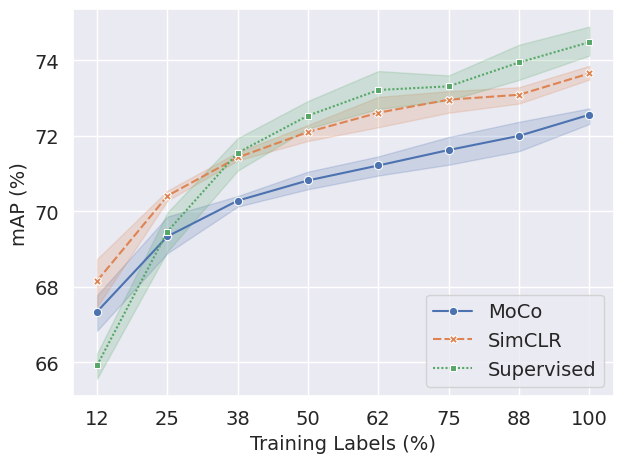

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(6.4, 4.8))
sns.lineplot(
    df_finetuned_xr50[df_finetuned_xr50['Category'] == 'superclass'],
    x='Folds', y='mAP', hue='Method', style="Method",
    hue_order=['moco', 'simclr', 'supervised'],
    style_order=['moco', 'simclr', 'supervised'],
    markers=True, dashes=True, ax=ax
)

ax.set_xlabel('Training Labels (%)', fontsize=14)
ax.set_ylabel('mAP (%)', fontsize=14)
ax.xaxis.set_major_formatter(FuncFormatter(num_fold_to_percentage))
ax.yaxis.set_major_formatter(FuncFormatter(to_percentage))
ax.tick_params(axis='both', which='major', labelsize=14)

legend_handles, legend_labels = ax.get_legend_handles_labels()
ax.legend(legend_handles, ['MoCo', 'SimCLR', 'Supervised'], fontsize=14, loc='lower right')

fig.tight_layout()

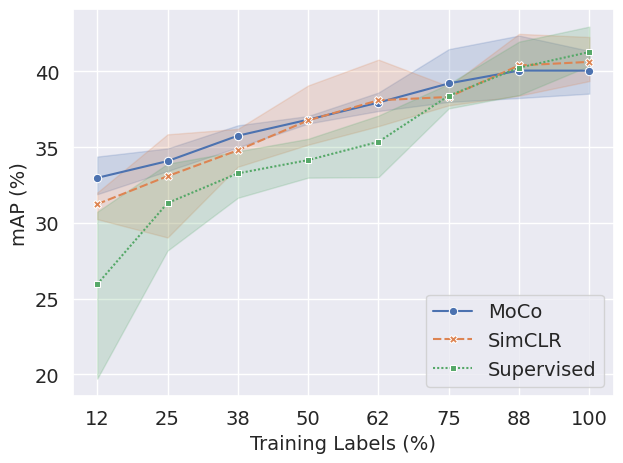

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(6.4, 4.8))
sns.lineplot(
    df_finetuned_xr50[df_finetuned_xr50['Category'] == 'subclass'],
    x='Folds', y='mAP', hue='Method', style="Method",
    hue_order=['moco', 'simclr', 'supervised'],
    style_order=['moco', 'simclr', 'supervised'],
    markers=True, dashes=True, ax=ax
)

ax.set_xlabel('Training Labels (%)', fontsize=14)
ax.set_ylabel('mAP (%)', fontsize=14)
ax.xaxis.set_major_formatter(FuncFormatter(num_fold_to_percentage))
ax.yaxis.set_major_formatter(FuncFormatter(to_percentage))
ax.tick_params(axis='both', which='major', labelsize=14)

legend_handles, legend_labels = ax.get_legend_handles_labels()
ax.legend(legend_handles, ['MoCo', 'SimCLR', 'Supervised'], fontsize=14, loc='lower right')
fig.tight_layout()